# Multivariate Visualizations

Up until now, we’ve discussed how to visualize single-feature distributions. Now, let’s understand how to visualize the relationship between more than one features.

We will continue to use the World Bank dataset, which contains information from 2015/16 about countries around the world. We will use the same features as before: GDP per capita, life expectancy, and population. 

In [115]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/world_bank.csv', index_col=0)
data.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Distribution of a numeric feature w.r.t a categorical features 

Let’s start by visualizing the distribution of a numeric feature, across the categories defined by a categorical feature. In other words, we want to visualize the distribution of a numeric feature, separately for each category of another categorical feature.

### Overlaid Histograms (1 numeric, 1 categorical)

We can use a histogram to visualize the distribution of a numeric variable. To visualize how this distribution differs between the groups created by another categorical variable, we can create a histogram for each group separately.

In order to create overlaid histograms, we will continue to use `sns.histplot`. The only addition we need to make is to use the **`hue` argument to specify the categorical feature** that defines the groups.

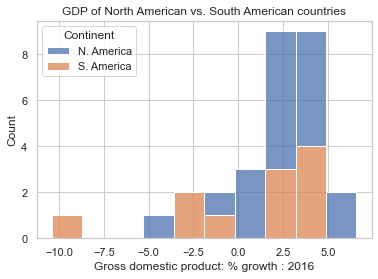

In [116]:
americas = data[data['Continent'].apply(lambda x: "America" in x)]

col = "Gross domestic product: % growth : 2016"

ax = sns.histplot(data = americas, x = col, hue="Continent",  multiple="stack");

ax.set(title="GDP of North American vs. South American countries");

Note the use of the **`hue`** argument to `histplot`. It adds a new dimension to the plot, by coloring the bars according to the value of the categorical feature.

`multiple="stack"` is an optional argument and is used to improve the visibility when  bars are stacked on top of each other. 


These visualizations are arguably the most ubiquitous in science. The canonical version of overlaid histograms are where a new drug is tested against a placebo, and the distribution of some outcome (e.g. blood pressure) is plotted for the placebo group and the drug group.

Most common statistical tests are designed to answer the question: “Do these two groups differ?” This question is answered by comparing the distributions of the two groups.

### Side-by-side box plots

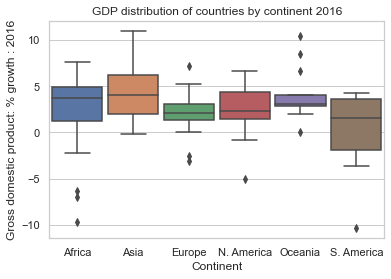

In [117]:
col = "Gross domestic product: % growth : 2016"

ax = sns.boxplot(data = data, y = col, x="Continent", width=0.9);

ax.set(title="GDP distribution of countries by continent 2016");

## Visualizing Relationships

In addition to visualizing the distribution of features, we often want to understand how two features are related. 


#### Scatter Plots (2 or more numeric features)

Scatter plots are one of the most useful tools in representing the relationship between two numerical features. They are particularly important in gauging the strength (correlation) of the relationship between features. Knowledge of these relationships can then motivate decisions in our modeling process.

In Matplotlib, we use the function plt.scatter to generate a scatter plot. Notice that unlike our examples of plotting single-variable distributions, now we specify sequences of values to be plotted along the x axis and the y axis.

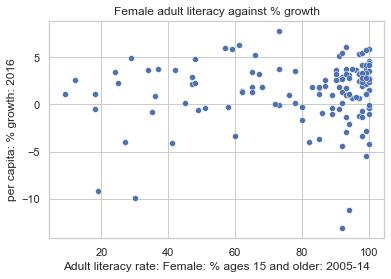

In [118]:
wb = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/world_bank.csv', index_col=0)

ax = sns.scatterplot(data = wb, \
                     x ='Adult literacy rate: Female: % ages 15 and older: 2005-14', \
                     y = "per capita: % growth: 2016")

ax.set(title="Female adult literacy against % growth");

In Seaborn, we call the function sns.scatterplot. We use the x and y parameters to indicate the values to be plotted along the x and y axes, respectively. By using the hue parameter, we can specify a third variable to be used for coloring each scatter point.

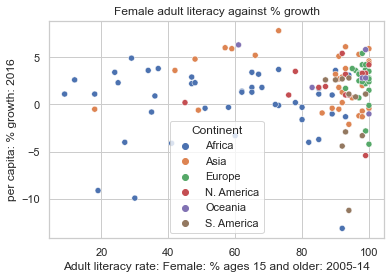

In [119]:
sns.scatterplot(data = wb, \
                y = "per capita: % growth: 2016", \
                x = "Adult literacy rate: Female: % ages 15 and older: 2005-14", 
                hue = "Continent")

plt.title("Female adult literacy against % growth");

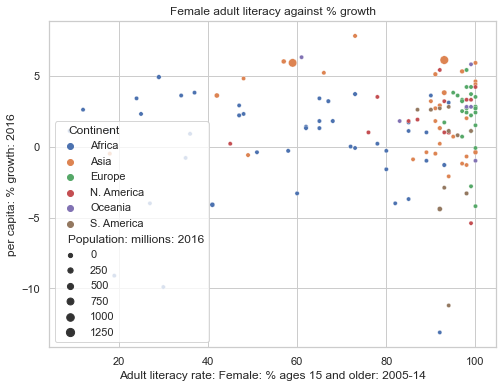

In [120]:
ax = sns.scatterplot(data = wb, \
                    y = "per capita: % growth: 2016", \
                    x = "Adult literacy rate: Female: % ages 15 and older: 2005-14", 
                    hue = "Continent", \
                    size="Population: millions: 2016")

ax.figure.set_size_inches(8, 6);

ax.set(title="Female adult literacy against % growth");

### Joint Plots (2 or more numeric features)

`sns.jointplot` creates a visualization with three components: a scatter plot, a histogram of the distribution of x values, and a histogram of the distribution of y values.

A joint plot visualizes both: relationship and distributions. 

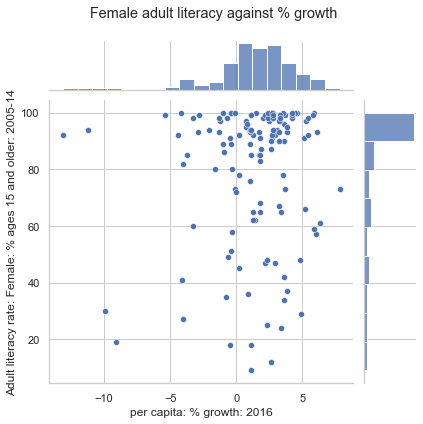

In [121]:
sns.jointplot(data = wb, 
              x = "per capita: % growth: 2016", \
              y = "Adult literacy rate: Female: % ages 15 and older: 2005-14")

# plt.suptitle allows us to shift the title up so it does not overlap with the histogram
plt.suptitle("Female adult literacy against % growth")
plt.subplots_adjust(top=0.9);

### Hex plots

**Hex plots** can be thought of as a two dimensional histograms that shows the joint distribution between two variables. This is particularly useful working with very dense data. In a hex plot, the x-y plane is binned into hexagons. Hexagons that are darker in color indicate a greater density of data – that is, there are more datapoints that lie in the region enclosed by the hexagon.

We can generate a hex plot using `sns.jointplot` modified with the kind parameter.

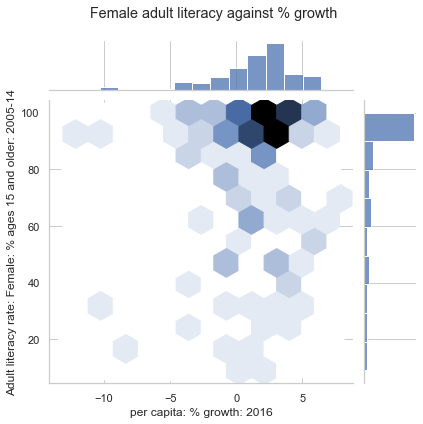

In [125]:
sns.jointplot(data = wb, \
              x = "per capita: % growth: 2016", \
              y = "Adult literacy rate: Female: % ages 15 and older: 2005-14", \
              kind = "hex")

# plt.suptitle allows us to shift the title up so it does not overlap with the histogram
plt.suptitle("Female adult literacy against % growth")
plt.subplots_adjust(top=0.9);

## Temporal Data: Line Plot

If you are trying to visualize the relationship between two numeric variables, and one of those variables is time, then you should use a line plot.

Line plots are useful for visualizing the relationship between two numeric variables when one of them is time.

In seaborn, we can create a line plot using the function **`sns.lineplot`**. We use the `x` and `y` parameters to specify the variable to be plotted along the x and y axes, respectively.

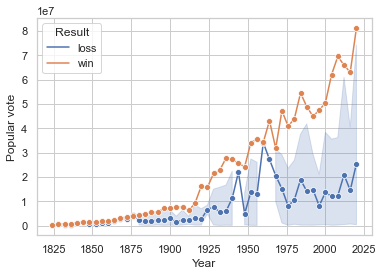

In [130]:
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/elections.csv')

sns.lineplot(data = data, x = "Year", y = "Popular vote", hue='Result', marker='o');

Note that seaborn automatically aggregates the data by taking the mean of each numeric variable at each time point. The shaded region around the line represents the 95% confidence interval for the mean. We'll talk more about confidence intervals in a later lecture.

## Multi-panel Visualizations

To create a multi-panel visualization, we can use the `sns.FacetGrid`. 

This class takes in a dataframe, the **names of the variables** that will form the **row, column, or hue dimensions** of the grid, and the **plot type** to be produced for each subset of the data. The plot type is provided as a method of the FacetGrid object.

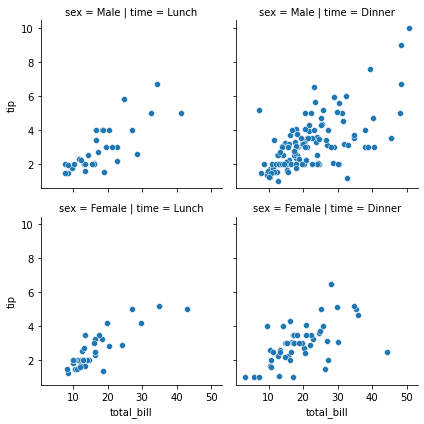

In [ ]:
import pandas as pd 
import seaborn as sns 

tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="time",  row="sex");
g.map(sns.scatterplot, "total_bill", "tip");

The variable specification in `FacetGrid.map()` requires a positional argument `mapping`, but if the function has a `data` parameter and accepts named variable assignments, you can also use `FacetGrid.map_dataframe()`:

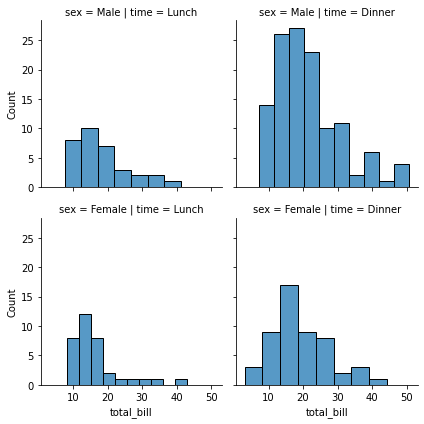

In [ ]:

g = sns.FacetGrid(tips, col="time",  row="sex");
g.map_dataframe(sns.histplot, x="total_bill");

The FacetGrid constructor accepts a hue parameter. Setting this will condition the data on another variable and make multiple plots in different colors. Where possible, label information is tracked so that a single legend can be drawn:

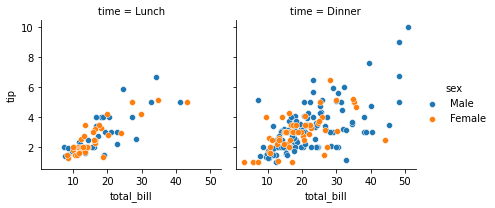

In [ ]:
g = sns.FacetGrid(tips, col="time", hue="sex");
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip");
g.add_legend();

The FacetGrid object has some other useful parameters and methods for tweaking the plot:

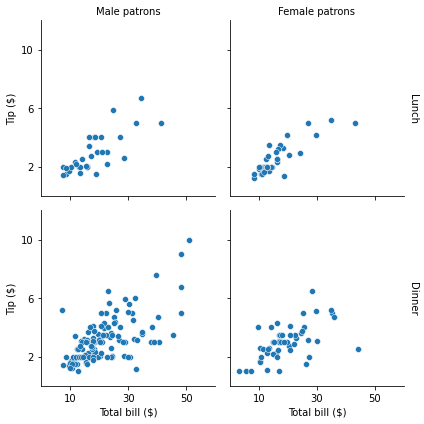

In [ ]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")